In [1]:
import ptwt
import pywt
from PIL import Image
import torchvision.transforms as transforms
import torch

In [2]:
img = Image.open('/home/mikhail/Coding/EZWImageCompression/dog.png')
transform = transforms.ToTensor()
img_tensor = transform(img)

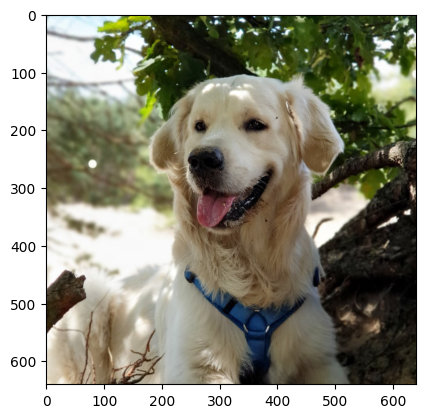

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor.permute(1, 2, 0))

In [4]:
t = pywt.wavedec2(img_tensor, 'haar',  level=2)

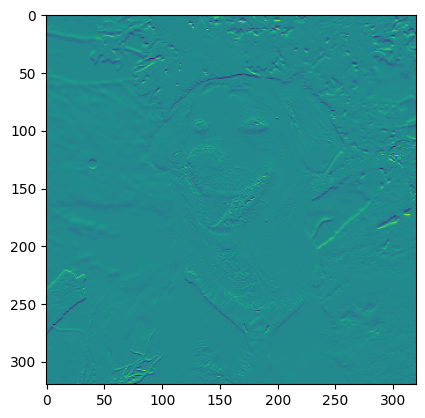

In [5]:
mat = t[2][0]
#mat = (mat - mat.min()) / (mat.max() - mat.min())
plt.imshow(mat[0])

In [6]:
from wavelet_augmentation import WaveletAugmentation

In [21]:
transform = WaveletAugmentation(5, trade_off=8, verbose=True)

In [22]:
collapsed = transform(img_tensor)

Zeroed 870355 elements
Zeroed 209722 elements
Zeroed 47510 elements
Zeroed 10263 elements
Zeroed 2128 elements


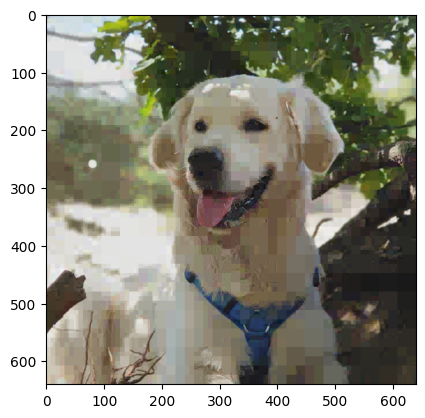

In [23]:
collapsed = (collapsed - collapsed.min()) / (collapsed.max() - collapsed.min())
plt.imshow(collapsed.permute(1, 2, 0))

In [10]:
torch.abs(collapsed - img_tensor).sum()

tensor(0.0570)